<a href="https://colab.research.google.com/github/jainrasik/Customer-Segmentation-Rasik-Jain/blob/main/Team_Colab_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Customer Segmentation for a UK-based and registered non-store online. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## This Team consist of Rasik Jain, Ashutosh

In [274]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm
plt.rcParams['axes.labelsize']=15
plt.rcParams['axes.titlesize']=15
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

In [3]:
# mounting the drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading the data file and creating dataframe 
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Customer Segmentation-Rasik Jain/Online Retail.xlsx')

In [5]:
# Checking the data
df.head()

InvoiceNo StockCode  ... CustomerID         Country
0    536365    85123A  ...    17850.0  United Kingdom
1    536365     71053  ...    17850.0  United Kingdom
2    536365    84406B  ...    17850.0  United Kingdom
3    536365    84029G  ...    17850.0  United Kingdom
4    536365    84029E  ...    17850.0  United Kingdom

[5 rows x 8 columns]

In [6]:
# Checking feature and records in our data set
df.shape

(541909, 8)

The data set contains 8 features and 541909 records

In [7]:
# Checking the general information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Summary:

* Stockcode, Description and country are String data type and comes under categorical features
* Quantity and UnitPrice comes under numerical feature
* Invoice No is unique for each transaction is of string data, but should be of int64 type and cutomerID is of int64 type. these both are also     comes under categorical feature
* InvoiceDate is of datetime data type 
* Description and CustomerID contains Null values

In [8]:
# checking the null value present in  our data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are 1454 and 135080 records having null value in Description and CustomerID feature

In [11]:
# Removing the null value present in  our data
df=df[~df['Description'].isnull()]
df=df[~df['CustomerID'].isnull()]
df.shape

(406829, 8)

In [12]:
# Checking null value count
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

df.describe()

In [13]:
#Having a descriptive look on the dataset
df.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

From the quantity section We see that 12 goods being sold on an average with a standard deviation of around 248. Also, the minimum quantity includes a negative value, this implies that the dataset also the includes canceled order returned items.
Customer id's mean/std is of no relevance to us.

In [19]:
# Checking number of unique value in each feature
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

Here we see following things:
* There are 3684 different products listed in the retail store
* Number of customer correspond to 4372 for this retail store.
* This retail stores sells products across 37 countries
* Description counts higher then StockCode, but we know items description for each unique stock code should be different.So the number of unique item stock codes and unique item description should be same.But as this is not true in our case.So we have to investigate it a bit.

In [160]:
# checking order frequency for each country
df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [100]:
# Checking the difference between stockcode and Description
temp_df=df.groupby(['StockCode','Description'])['Description'].count().groupby(['StockCode']).count().reset_index()
temp_df=temp_df[temp_df['Description']>1]
temp_df=df[df['StockCode'].isin(temp_df['StockCode'])]
temp_df.groupby(['StockCode','Description'])['InvoiceNo'].count().reset_index().head(10)

StockCode                          Description  InvoiceNo
0     20622                  VIP PASSPORT COVER          11
1     20622                   VIPPASSPORT COVER          22
2     20725              LUNCH BAG RED RETROSPOT       1358
3     20725                 LUNCH BAG RED SPOTTY          1
4     20914  SET/5 RED RETROSPOT LID GLASS BOWLS        817
5     20914     SET/5 RED SPOTTY LID GLASS BOWLS          1
6     21109     LARGE CAKE TOWEL CHOCOLATE SPOTS         69
7     21109    LARGE CAKE TOWEL, CHOCOLATE SPOTS          4
8     21112         SWISS ROLL TOWEL PINK  SPOTS         27
9     21112        SWISS ROLL TOWEL, PINK  SPOTS         19

So,there are different description due to typing error.It can be true since they are typed by humans,so there is always a chance of error

In [106]:
# Calculating revenue gained from eacg column
df['revenue']=df['Quantity']*df['UnitPrice']

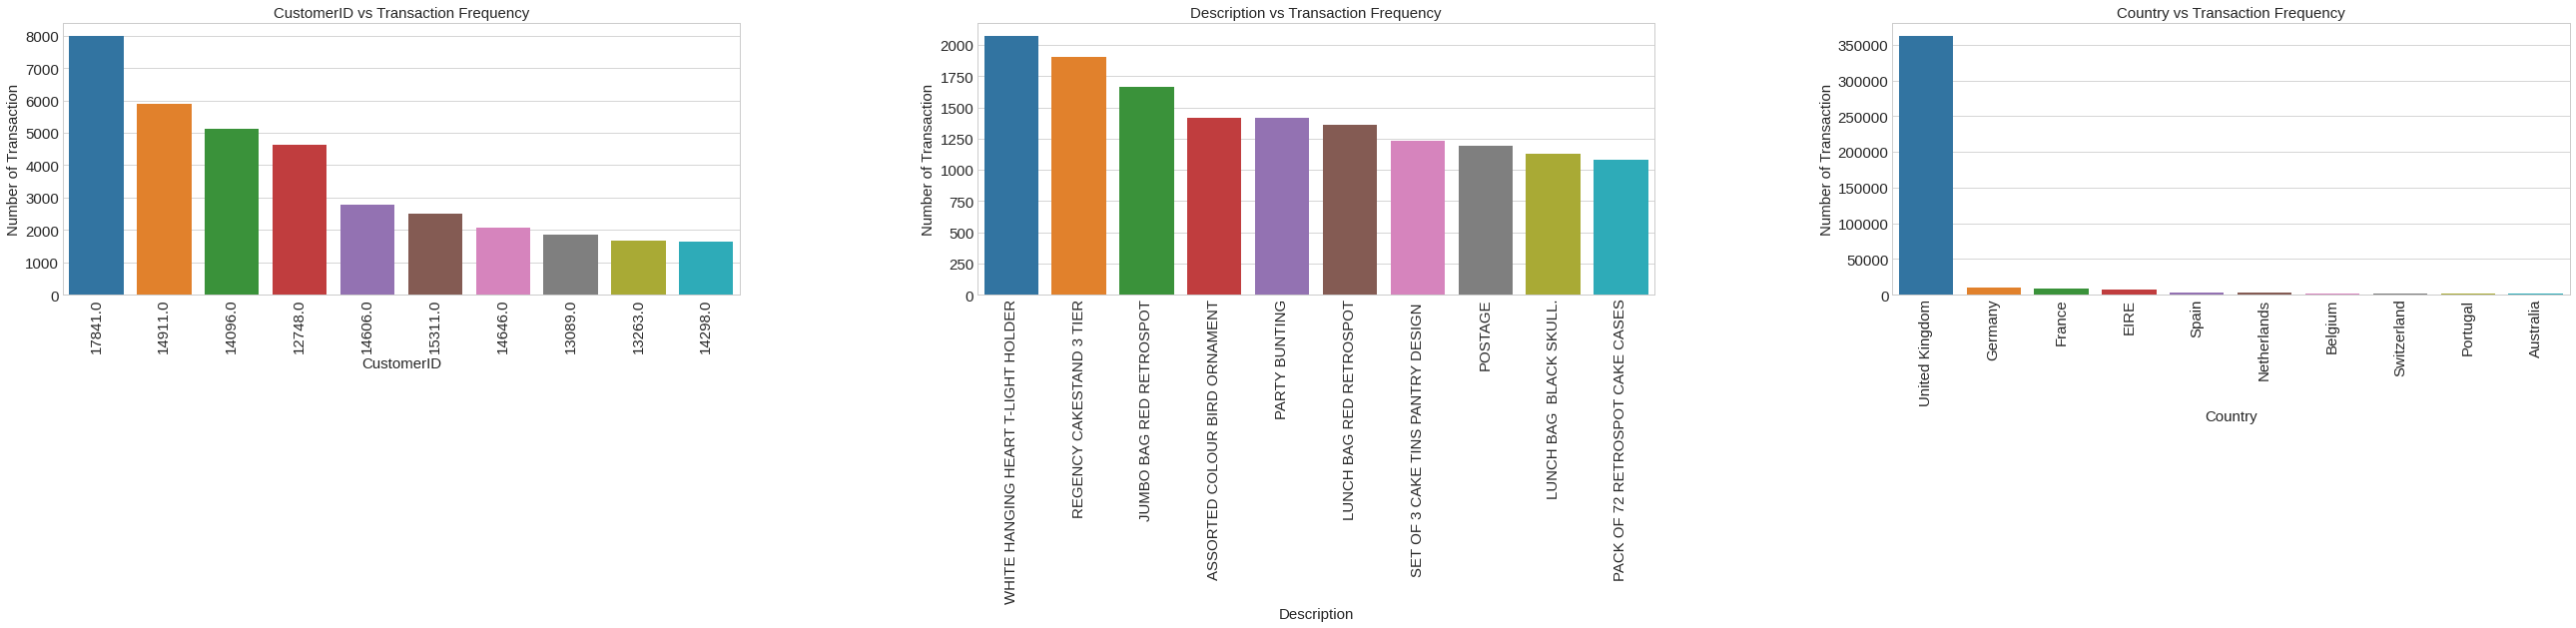

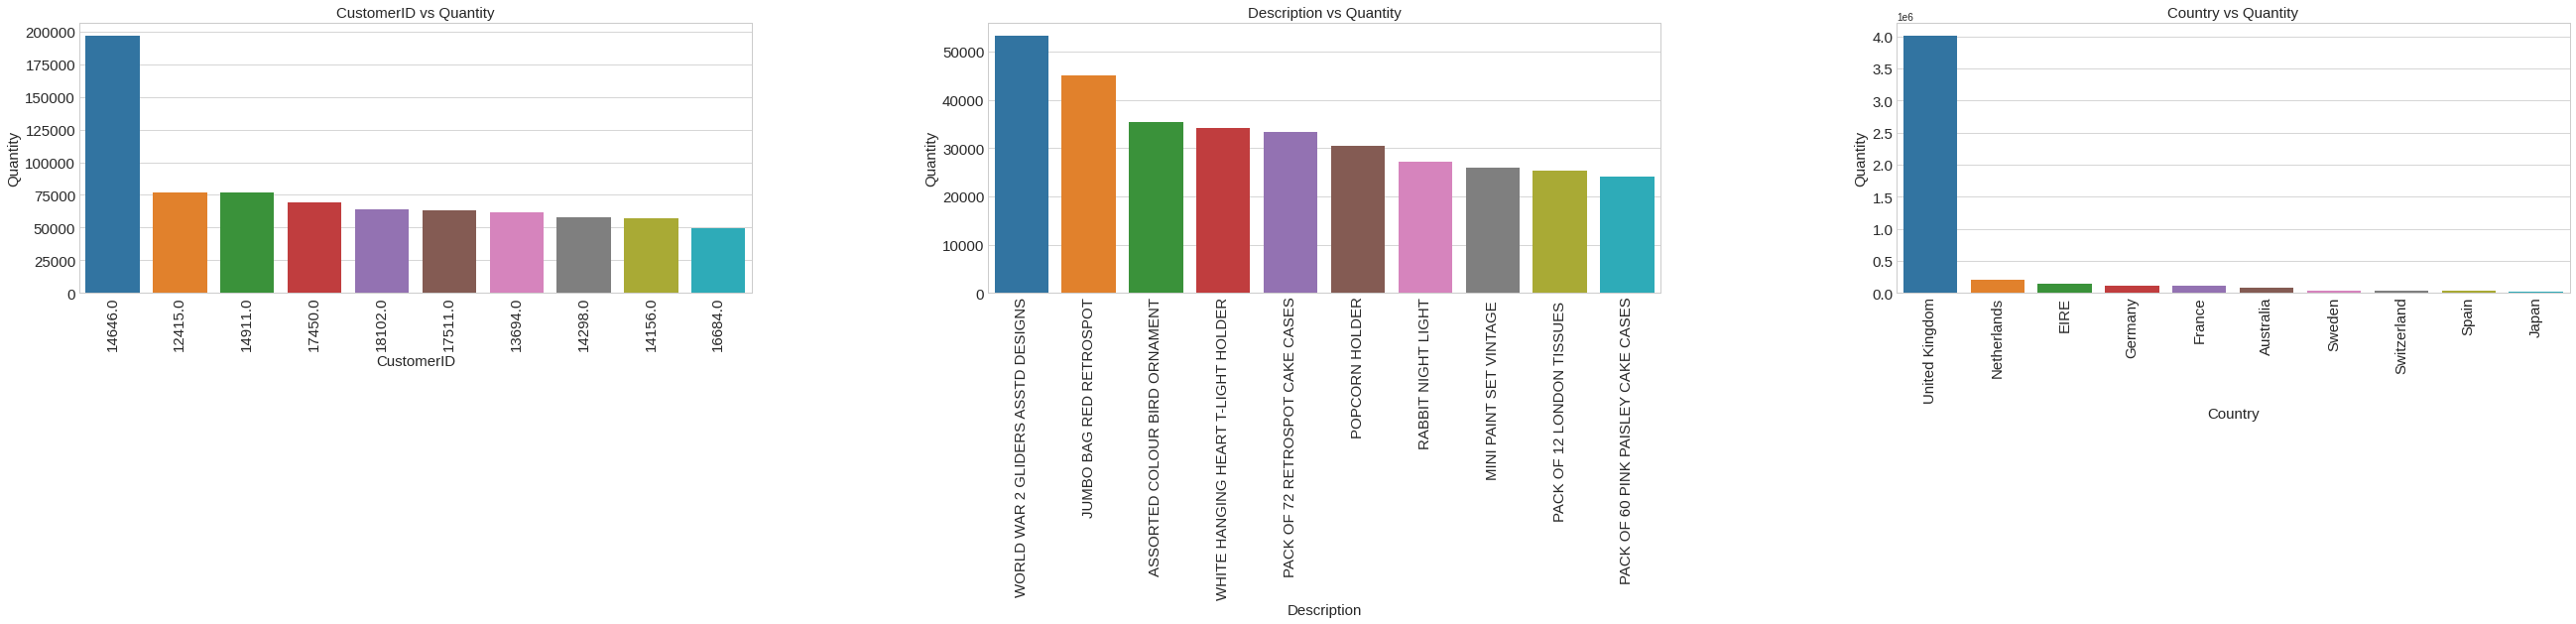

In [156]:
# Checking Top 10 Customer,country, product having maximum frequency of transaction and quantity ordered
Categorical_Variable=['CustomerID','Description','Country']
plt.figure(figsize=[45,5])
plt.subplots_adjust(wspace=0.35)
for i,col in enumerate(Categorical_Variable):
  data=df.groupby(col)['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo',ascending=False).head(10).rename({'InvoiceNo':'Number of Transaction'},axis=1)
  plt.subplot(1,3,i+1)
  sns.barplot(data=data,x=col,y='Number of Transaction',order=data.sort_values(by='Number of Transaction',ascending=False)[col])
  plt.xticks(rotation=90)
  plt.title(f'{col} vs Transaction Frequency',fontsize=15)
  plt.tick_params(labelsize=15)
value='Quantity'
plt.figure(figsize=[45,5])
plt.subplots_adjust(wspace=0.35)
for i,col in enumerate(Categorical_Variable):
  data=df.groupby(col)[value].sum().reset_index().sort_values(by=value,ascending=False).head(10).rename({value:value},axis=1)
  plt.subplot(1,3,i+1)
  sns.barplot(data=data,x=col,y=value,order=data.sort_values(by=value,ascending=False)[col])
  plt.xticks(rotation=90)
  plt.title(f'{col} vs {value}',fontsize=15)
  plt.tick_params(labelsize=15)
plt.show()

* CustomerID: 17841 has done maximium order frequency and CustomerID : 14646 ordered maximum quantity of a particular product
* product having description "White hanging heart t light holder' has maximum order frequency and "World war 2  glider asstd design' has maximuim ordered quantity
* Majority of order and maximum ordered quantity comes from UK, which is true has retail store is in UK


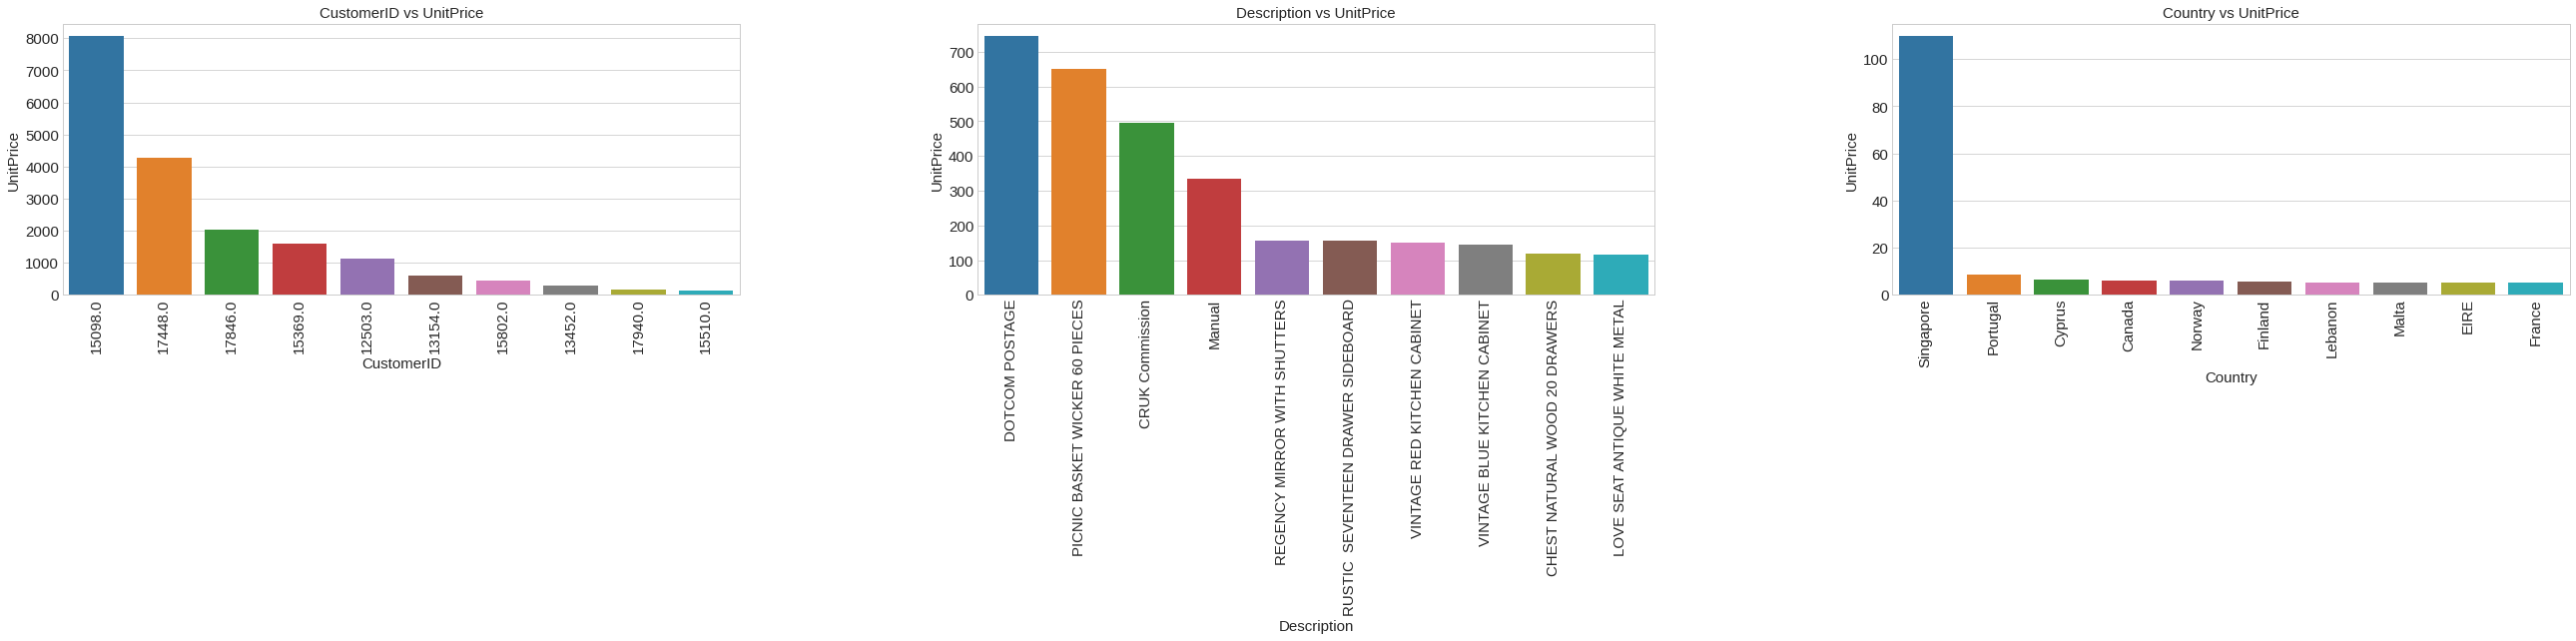

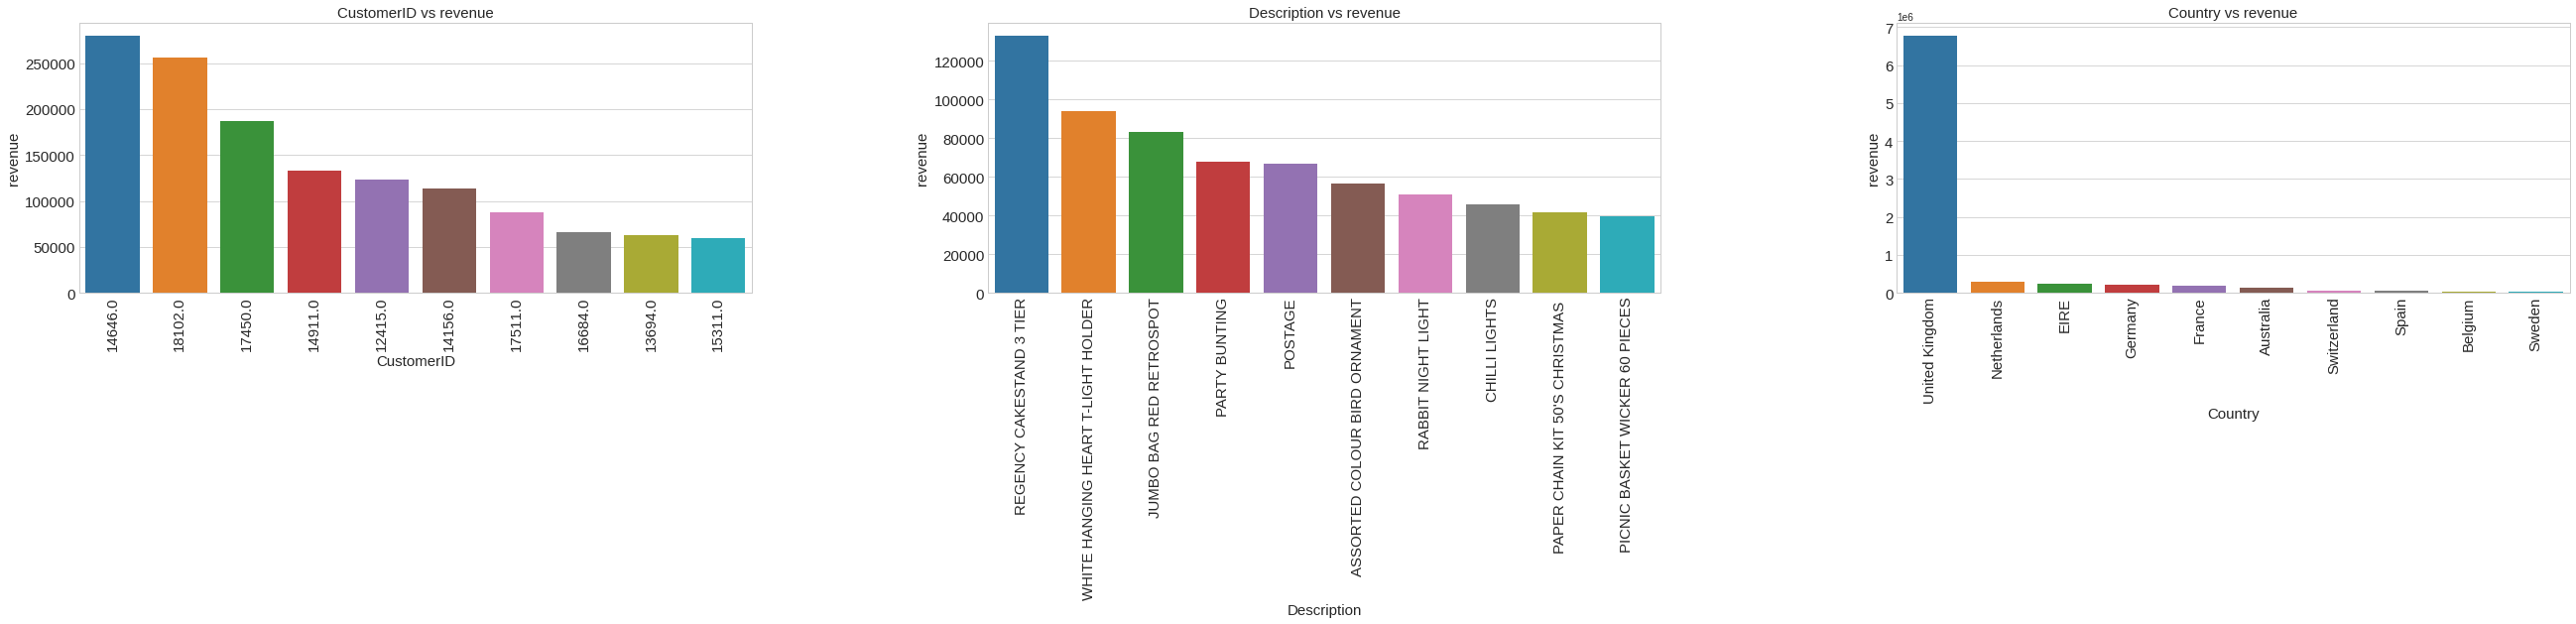

In [159]:
# Checking Top 10 Customer,country, product having maximum of unitprice and revenue 
plt.figure(figsize=[45,5])
value='UnitPrice'
plt.subplots_adjust(wspace=0.35)
for i,col in enumerate(Categorical_Variable):
  data=df.groupby(col)[value].mean().reset_index().sort_values(by=value,ascending=False).head(10).rename({value:value},axis=1)
  plt.subplot(1,3,i+1)
  sns.barplot(data=data,x=col,y=value,order=data.sort_values(by=value,ascending=False)[col])
  plt.xticks(rotation=90)
  plt.title(f'{col} vs {value}',fontsize=15)
  plt.tick_params(labelsize=15)
plt.show()
plt.figure(figsize=[45,5])
plt.subplots_adjust(wspace=0.35)
value='revenue'
for i,col in enumerate(Categorical_Variable):
  data=df.groupby(col)[value].sum().reset_index().sort_values(by=value,ascending=False).head(10).rename({value:value},axis=1)
  plt.subplot(1,3,i+1)
  sns.barplot(data=data,x=col,y=value,order=data.sort_values(by=value,ascending=False)[col])
  plt.xticks(rotation=90)
  plt.title(f'{col} vs {value}',fontsize=15)
  plt.tick_params(labelsize=15)
plt.show()

* CustomerID: 15195 has ordered max unit price product and CustomerID : 14646 ordered spends maximum amount.
* product having description "Dotcom postage' has maximum unit price and "regency cakestand 3 tier' has maximuim revenue earned
* Maximium unit price and maximum revenue comes from UK

In [177]:
# Creating customer order frequency variable
df_customer_frequency =df['CustomerID'].value_counts().reset_index()
df_customer_frequency.columns=['CustomerID','Frequency']
df_customer_frequency.head()

CustomerID  Frequency
0     17841.0       7983
1     14911.0       5903
2     14096.0       5128
3     12748.0       4642
4     14606.0       2782

In [176]:
# Creating customer total amount spent variable
df_customer_amount_spent=df.groupby("CustomerID")['revenue'].sum().reset_index()
df_customer_amount_spent.columns=['CustomerID','Amount']
df_customer_amount_spent.head()

CustomerID   Amount
0     12346.0     0.00
1     12347.0  4310.00
2     12348.0  1797.24
3     12349.0  1757.55
4     12350.0   334.40

In [254]:
# merging frequency and amount DataFrame
new_df=pd.merge(df_customer_frequency,df_customer_amount_spent,on='CustomerID',how='inner')
new_df.head()

CustomerID  Frequency     Amount
0     17841.0       7983   40340.78
1     14911.0       5903  132572.62
2     14096.0       5128   57120.91
3     12748.0       4642   29072.10
4     14606.0       2782   11713.85

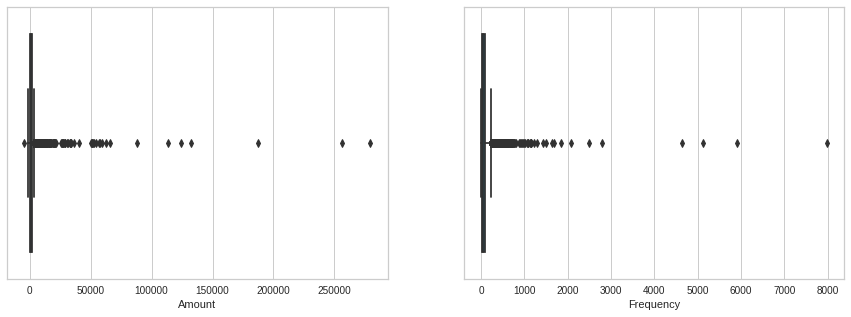

In [255]:
# checking for outlier in amount and frequency
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(data=new_df,x='Amount')
plt.subplot(1,2,2)
sns.boxplot(data=new_df,x='Frequency')
plt.show()

In [256]:
# Removing outlier 
for i in range(1,10):
  IQR=new_df.Amount.quantile(0.75)-new_df.Amount.quantile(0.25)
  ul=new_df.Amount.quantile(0.75)+1.5*IQR
  ll=new_df.Amount.quantile(0.25)-1.5*IQR
  print(ul,ll)
  new_df=new_df[(new_df['Amount']>ll)&(new_df['Amount']<ul)]
  IQR=new_df.Frequency.quantile(0.75)-new_df.Frequency.quantile(0.25)
  ul=new_df.Frequency.quantile(0.75)+1.5*IQR
  ll=new_df.Frequency.quantile(0.25)-1.5*IQR
  print(ul,ll)
  new_df=new_df[(new_df['Frequency']>ll)&(new_df['Frequency']<ul)]

3589.2687499999984 -1684.1812499999987
178.5 -81.5
2244.249999999998 -949.5899999999989
129.0 -55.0
1824.74375 -733.4662500000001
110.5 -45.5
1598.8425000000002 -614.1775000000002
102.0 -42.0
1446.7287499999993 -535.5812499999996
94.5 -37.5
1380.3474999999999 -501.9525
89.5 -34.5
1344.50625 -486.64374999999984
91.0 -37.0
1327.35 -477.7699999999998
88.5 -35.5
1318.1025000000004 -474.2375000000003
88.5 -35.5


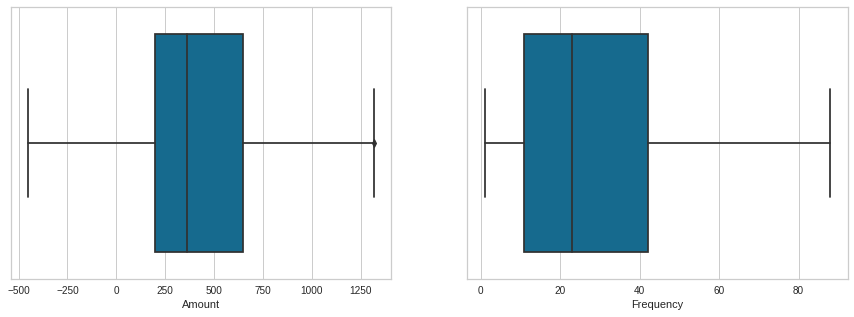

In [257]:
# checking for outlier in amount and frequency
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(data=new_df,x='Amount')
plt.subplot(1,2,2)
sns.boxplot(data=new_df,x='Frequency')
plt.show()

In [258]:
# Dropping customerID for further processing
new_df.drop('CustomerID',axis=1,inplace=True)

Now,the range of "Amount column" and "Frequency column" differes very much. So we will use Standard Scaler transformstion for uniform data.


In [263]:
# applying normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
new_df_norm=scaler.fit_transform(new_df)
X=pd.DataFrame(new_df_norm,columns=['Frequency','Amount'])
X

Frequency    Amount
0      2.768757 -0.676372
1      2.768757 -0.420181
2      2.768757 -0.242209
3      2.768757  0.318283
4      2.768757  1.015334
...         ...       ...
2777  -1.297956 -1.285926
2778  -1.297956 -1.406203
2779  -1.297956 -1.082240
2780  -1.297956 -0.691272
2781  -1.297956 -1.342455

[2782 rows x 2 columns]

Applying Kmean Clustering

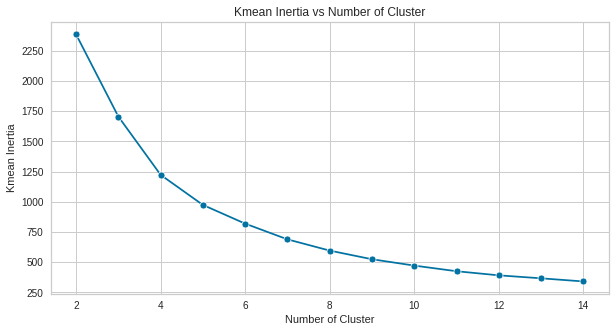

In [264]:
# Checking for optimum number of cluster
plt.figure(figsize=[10,5])
wcss=[]
for k in range(2,15):
  kmean=KMeans(n_clusters=k)
  kmean.fit(X)
  wcss.append(kmean.inertia_)
sns.lineplot(x=range(2,15),y=wcss,marker='o')
plt.title('Kmean Inertia vs Number of Cluster')
plt.xlabel('Number of Cluster')
plt.ylabel('Kmean Inertia')
plt.show()

Here from above graph we see the the curve stats becoming pleateau after 8. thus, we see

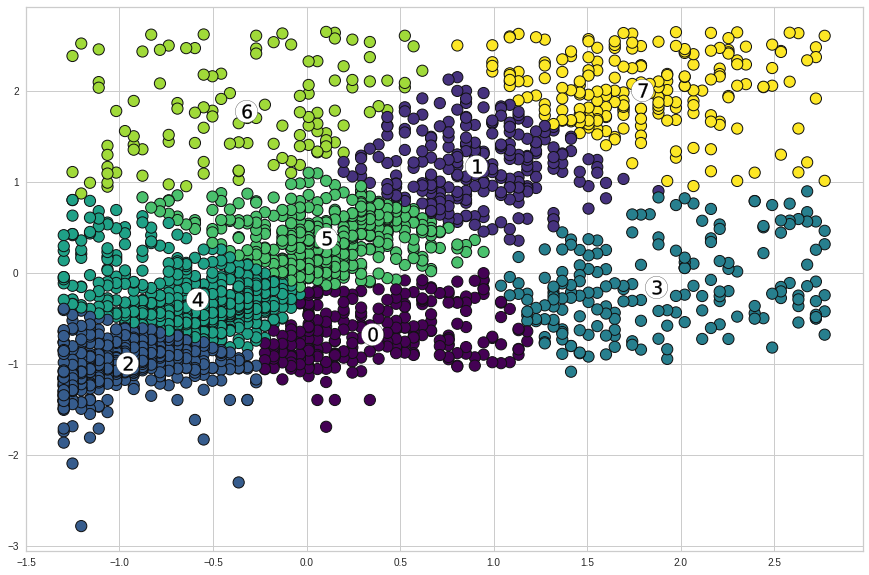

In [269]:
# plotting optimum cluster
plt.figure(figsize=[15,10])
kmean=KMeans(n_clusters=8,random_state=0)
label=kmean.fit_predict(X)
center=kmean.cluster_centers_
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=label,marker='.',alpha=1,s=500,lw=1,edgecolors='K',cmap='viridis')
plt.scatter(center[:,0],center[:,1],c='white',marker='o', alpha=1, s=500, edgecolor='k')

for i,c in enumerate(center):
 plt.scatter(c[0],c[1],c='black',marker='$%d$'%i, alpha=1, s=200, edgecolor='k')

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f46e5f082d0>,
                 k=None, metric=None, model=None, timings=True)

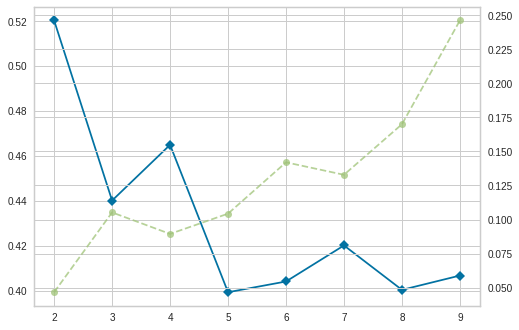

In [268]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans(),metric='silhouette',k=(2,10))
model.fit(X)

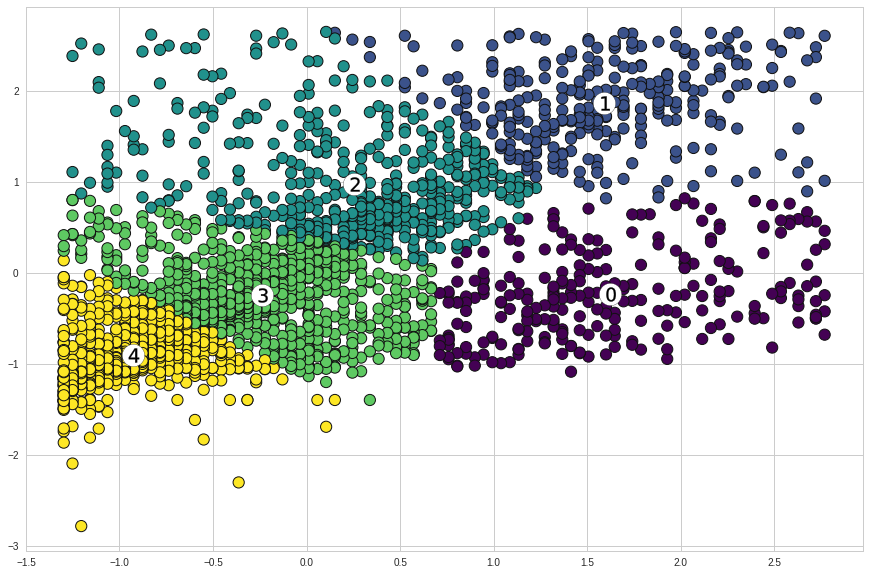

In [295]:
plt.figure(figsize=[15,10])
kmean=KMeans(n_clusters=5,random_state=0)
label=kmean.fit_predict(X)
center=kmean.cluster_centers_
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=label,marker='.',alpha=1,s=500,lw=1,edgecolors='K',cmap='viridis')
plt.scatter(center[:,0],center[:,1],c='white',marker='o', alpha=1, s=500, edgecolor='k')

for i,c in enumerate(center):
 plt.scatter(c[0],c[1],c='black',marker='$%d$'%i, alpha=1, s=200, edgecolor='k')

In [282]:
class optimal_cluster:
  def __init__(self,X,K,nx):
    self.X=X
    self.K=K
    self.nx=nx
    self.ny=int(K/nx)
    self.cluster_range=list(range(2,K+1))
  def clusterplotsingle(self,n):
    kmean=KMeans(n_clusters=n,random_state=0)
    label=kmean.fit_predict(X)
    center=kmean.cluster_centers_
    plt.scatter(X.iloc[:,0],X.iloc[:,1],c=label,marker='.',alpha=1,s=500,lw=1,edgecolors='K',cmap='viridis')
    plt.scatter(center[:,0],center[:,1],c='white',marker='o', alpha=1, s=500, edgecolor='k')
    for i,c in enumerate(center):
     plt.scatter(c[0],c[1],c='black',marker='$%d$'%i, alpha=1, s=200, edgecolor='k')
    plt.show()

  def silhouteplot(self):
    nx,K=self.nx,self.K
    ny=int(K/nx)
    plt.figure(figsize=[10*nx,10*ny])
    SAS=[]
    count=1
    for n,ncluster in enumerate(self.cluster_range):
      cluster=KMeans(n_clusters=ncluster,random_state=0)
      label=cluster.fit_predict(X)
      SAS.append(silhouette_score(X,label))
      SSS=silhouette_samples(X,label)
      ylower=10
      plt.subplot(ny,nx,count)
      for i in range(ncluster):
          color = cm.nipy_spectral(float(i) / ncluster)
          temp=SSS[label==i]
          temp.sort()
          cs=temp.shape[0]
          yupper=ylower+cs
          plt.fill_betweenx(np.arange(ylower,yupper),temp,facecolor=color)
          plt.text(-0.03,ylower+0.5*cs,i)
          ylower=yupper
      count=count+1
      plt.axvline(SAS[n],color='b',linestyle='dashed',label = 'silhoute score = %0.2f' % SAS[n]) 
      plt.legend(loc='lower right',fontsize=15)
      plt.title('number of cluster = %s'%ncluster,fontsize=15)
      plt.xlabel("The silhouette coefficient values")
      plt.ylabel("Cluster label")
    plt.show()  
  def clusterplot(self):
    nx,K=self.nx,self.K
    ny=int(K/nx)
    plt.figure(figsize=[10*nx,10*ny])
    count=1
    for n,ncluster in enumerate(self.cluster_range):
        cluster=KMeans(n_clusters=ncluster,random_state=0)
        label=cluster.fit_predict(X)
        plt.subplot(ny,nx,count)
        plt.scatter(X.iloc[:,0],X.iloc[:,1],c=label,marker='.',s=500,lw=0.5,edgecolors='K',cmap='viridis')
        center=cluster.cluster_centers_
        plt.scatter(center[:,0],center[:,1],c='white',marker='o', alpha=1, s=500, edgecolor='k')
        for i,c in enumerate(center):
          plt.scatter(c[0],c[1],c='black',marker='$%d$' %i, alpha=1, s=200, edgecolor='k')
        count=count+1
        plt.title('number of cluster = %s'%ncluster,fontsize=15)
        plt.xlabel("1st feature")
        plt.ylabel("2nd feature")
    plt.show()

In [283]:
a=optimal_cluster(X,K=10,nx=5)

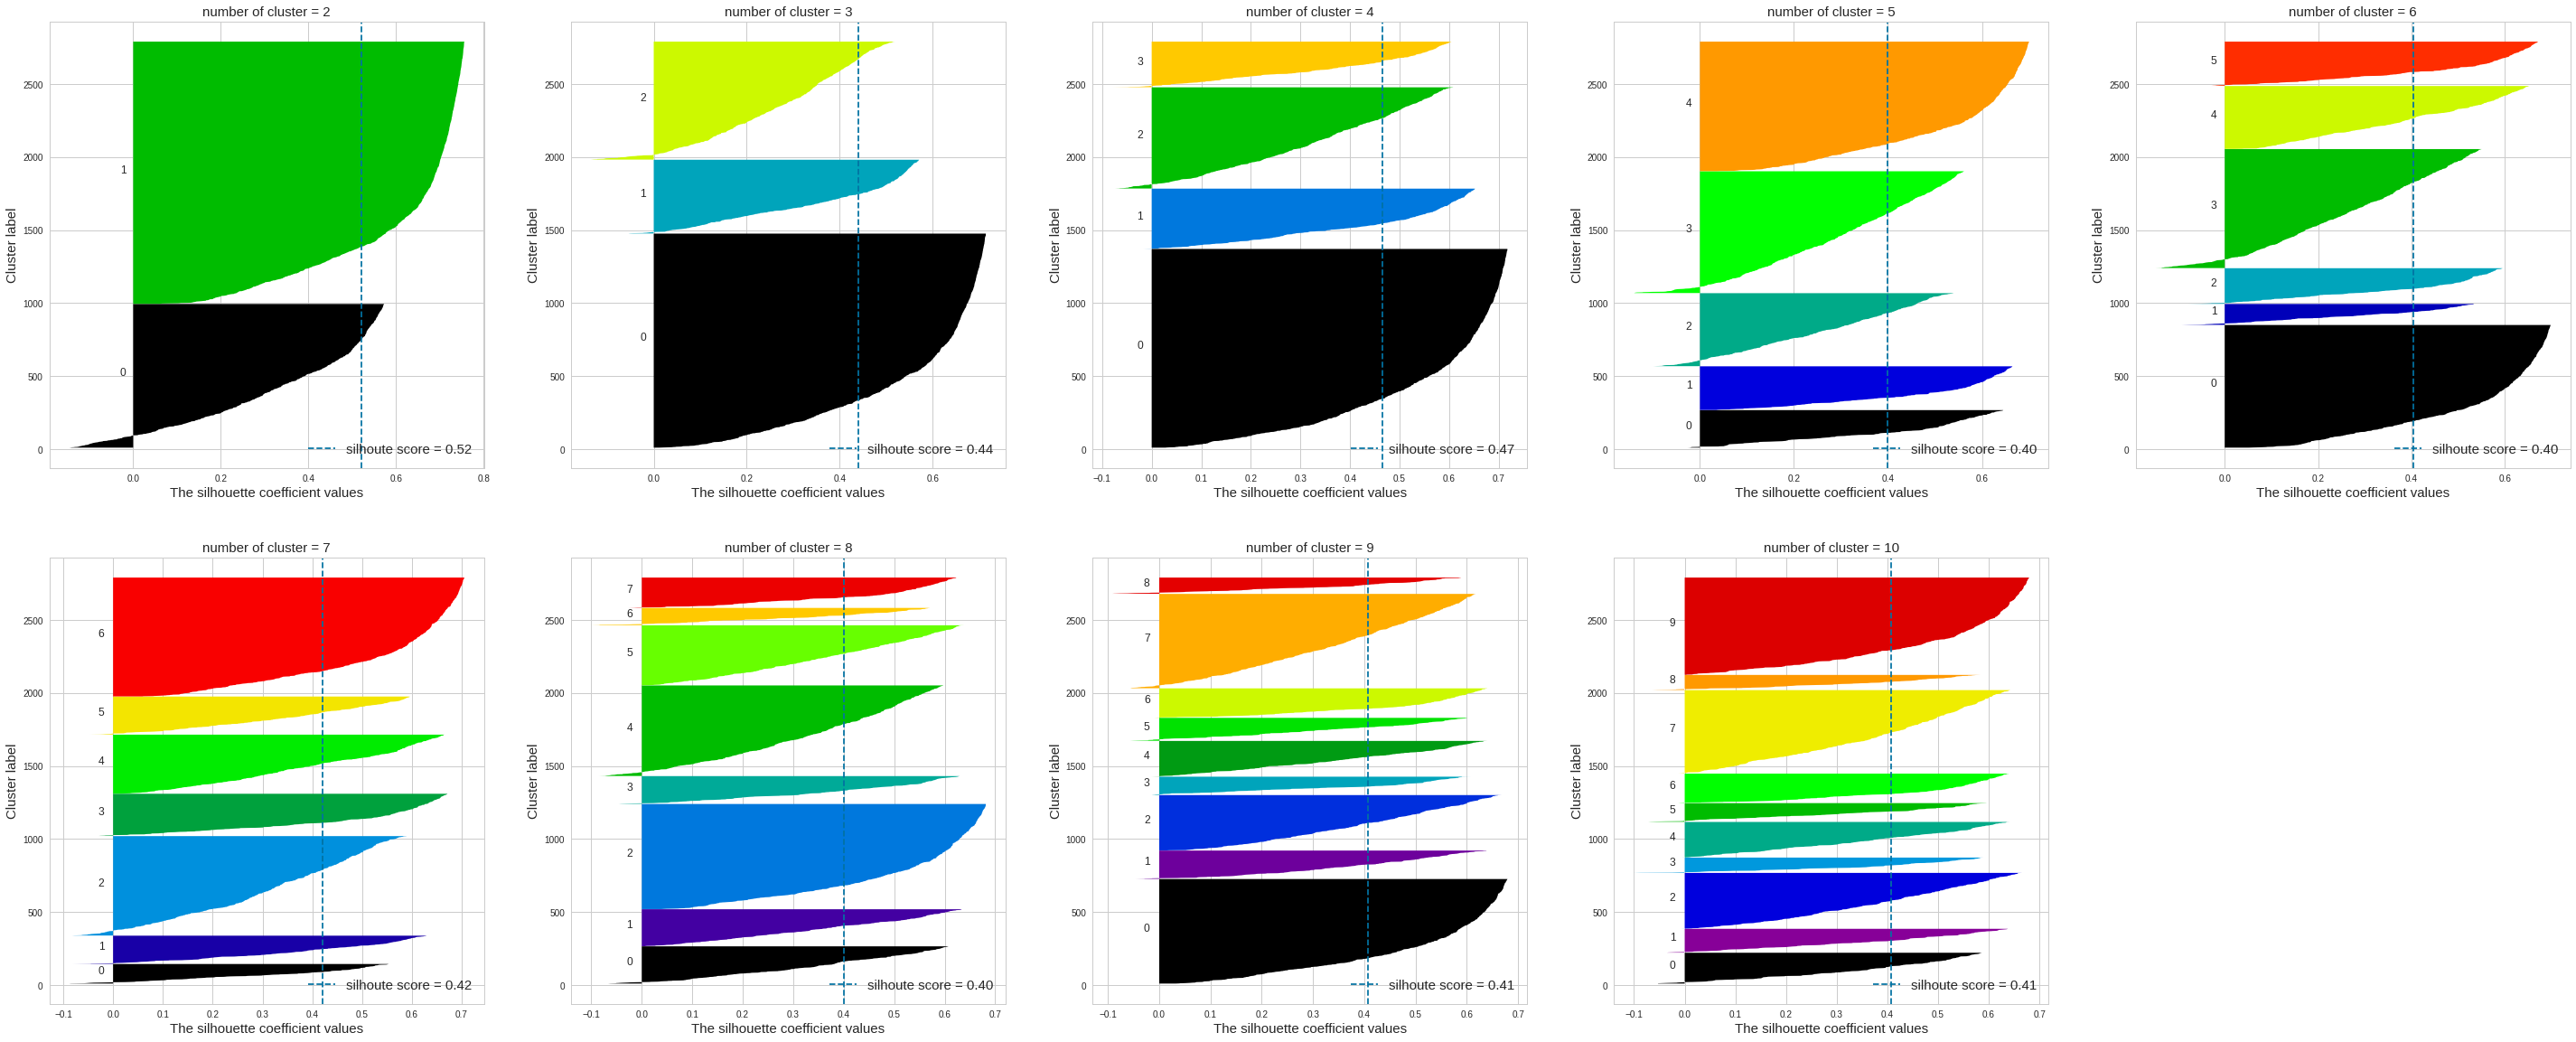

In [284]:
a.silhouteplot()

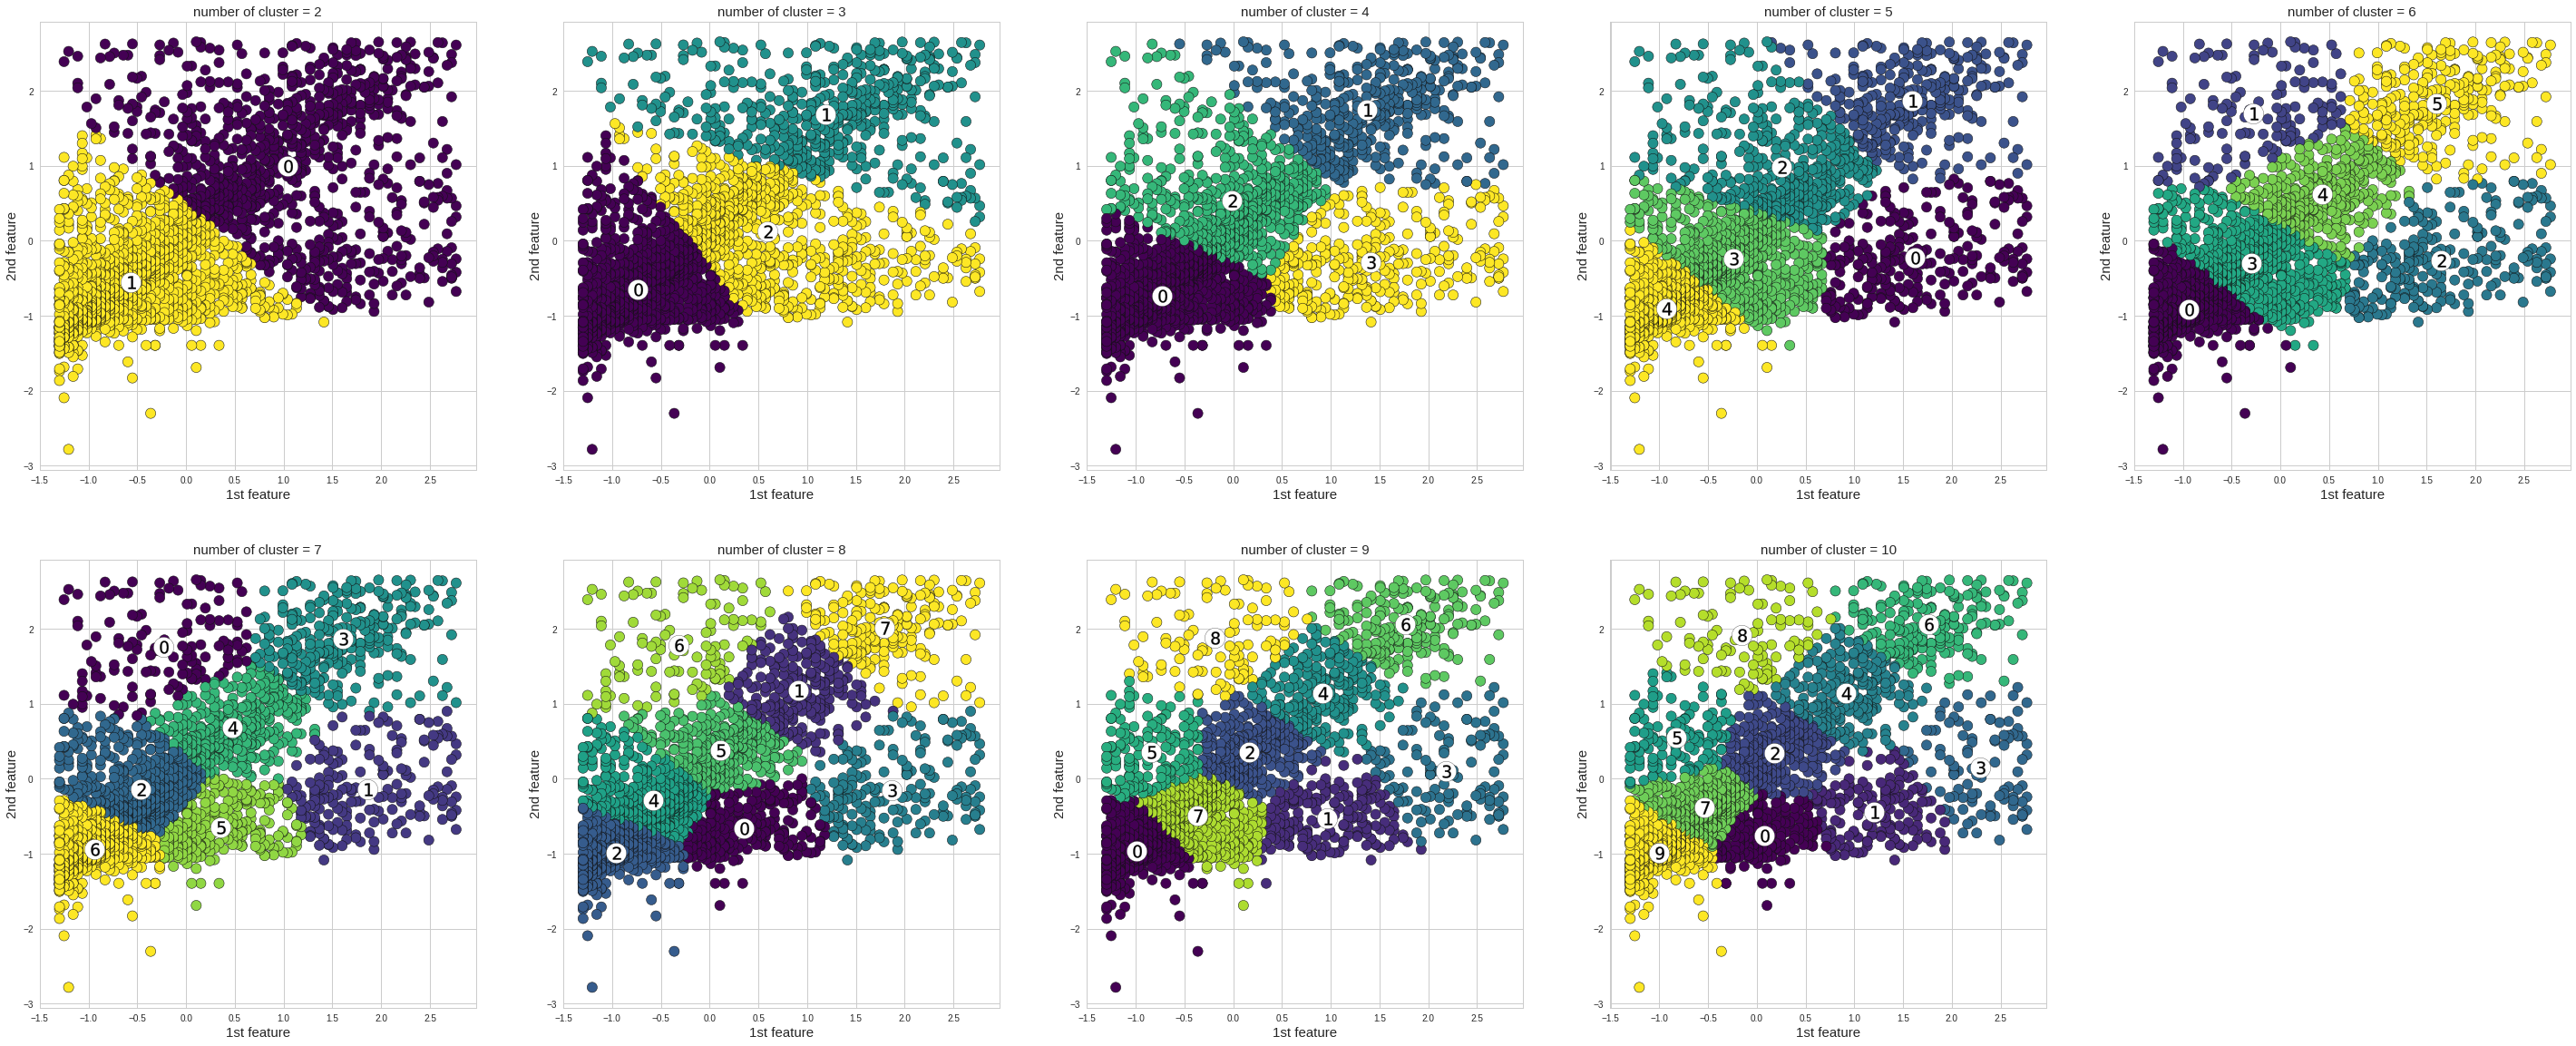

In [285]:
a.clusterplot()

In [286]:
import scipy.cluster.hierarchy as sch

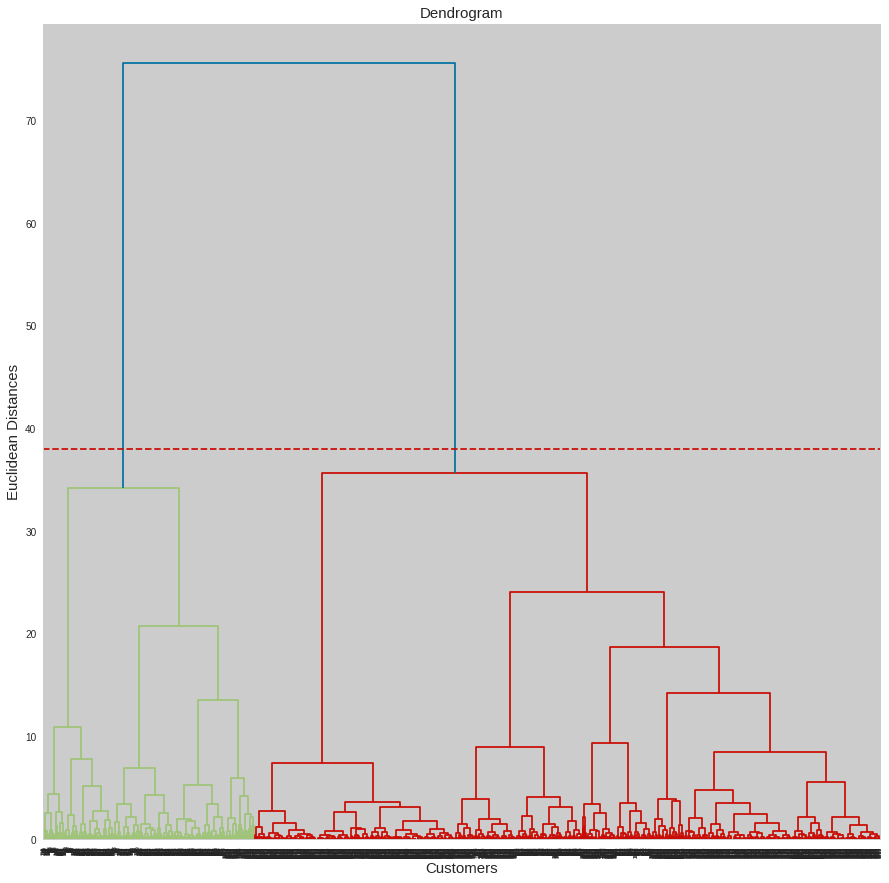

In [287]:
# plotting dendograph to see optinum number of cluster 
plt.figure(figsize=[15,15])
dendo=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=38, color='r', linestyle='--')

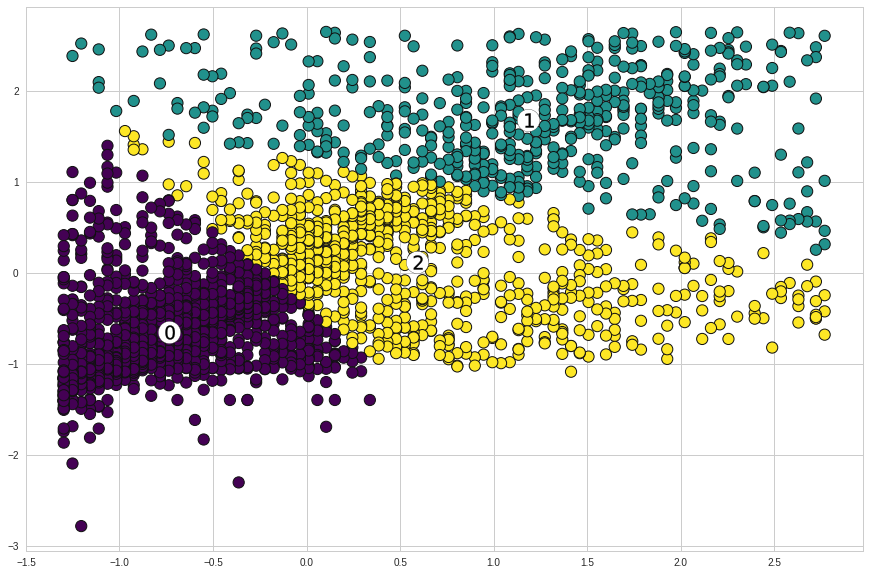

In [288]:
plt.figure(figsize=[15,10])
a.clusterplotsingle(3)

Conclusion: